In [339]:
import keras
from keras import layers
from keras import backend as K
from keras.models import Model
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy.spatial import distance
from sklearn.metrics import pairwise_distances
import seaborn as sns
from sklearn.preprocessing import StandardScaler

%matplotlib inline

In [340]:
sns.set_context(context = 'paper',font_scale = 2)

In [252]:
df = pd.read_csv('/Users/alexisrutherford/Desktop/fow_game/jobSkillMat.csv',delimiter='\t')
isTasks = True
df = df.iloc[:,2:]

In [389]:
df = pd.read_csv('job_skill_matrix/job_skill_matrix_combined.csv')
## Full data
isTasks = False
df = df.iloc[:,2:]

In [342]:
df.head()

,2.A.1.a,2.A.1.b,2.A.1.c,2.A.1.d,2.A.1.e,2.A.1.f,2.A.2.a,2.A.2.b,2.A.2.c,2.A.2.d,...,2.C.7.a,2.C.7.b,2.C.7.c,2.C.7.d,2.C.7.e,2.C.8.a,2.C.8.b,2.C.9.a,2.C.9.b,2.C.10
0,4.12,4.12,4.00,4.38,3.25,1.88,4.38,4.00,3.12,4.12,...,4.07,1.56,1.43,1.48,1.70,3.30,3.92,1.76,2.70,2.21
1,4.00,3.88,3.88,4.00,2.75,1.75,4.00,3.50,3.38,3.62,...,3.81,1.40,1.38,1.80,1.85,2.40,2.88,1.58,2.84,2.42
2,3.88,4.00,3.25,4.00,2.38,1.88,3.88,3.50,3.00,4.00,...,3.71,1.62,1.16,1.21,1.51,3.10,2.95,2.50,2.59,2.20
3,3.75,4.00,3.75,4.00,3.00,1.50,3.75,3.25,2.75,3.25,...,4.35,1.68,2.90,1.34,1.47,1.78,1.87,3.06,4.33,1.61
4,3.88,3.88,3.25,3.88,2.75,1.75,3.88,3.88,3.12,3.75,...,4.48,1.64,1.70,1.68,1.64,2.50,2.86,2.86,3.80,1.68


In [253]:
df.head()

,Oral Comprehension,Written Comprehension,Oral Expression,Written Expression,Fluency of Ideas,Originality,Problem Sensitivity,Deductive Reasoning,Inductive Reasoning,Information Ordering,...,Freedom to Make Decisions,Degree of Automation,Importance of Being Exact or Accurate,Importance of Repeating Same Tasks,Structured versus Unstructured Work,Level of Competition,Time Pressure,Pace Determined by Speed of Equipment,Work Schedules,Duration of Typical Work Week
0,0.625714,0.625714,0.642857,0.588571,0.482857,0.445714,0.588571,0.642857,0.607143,0.554286,...,0.2800,0.0400,0.2800,0.2800,0.1600,0.1200,0.2400,0.0000,0.0800,0.8000
1,0.590000,0.518571,0.590000,0.518571,0.500000,0.464286,0.464286,0.447143,0.428571,0.464286,...,0.2379,0.0223,0.3677,0.1737,0.2502,0.5903,0.4411,0.0120,0.1738,0.2890
2,0.642857,0.697143,0.697143,0.607143,0.571429,0.517143,0.625714,0.660000,0.625714,0.588571,...,0.3030,0.0000,0.6667,0.1515,0.2424,0.2121,0.0606,0.0000,0.0303,0.6364
3,0.445714,0.428571,0.428571,0.321429,0.250000,0.250000,0.428571,0.392857,0.392857,0.428571,...,0.4016,0.0845,0.2680,0.1639,0.1401,0.0754,0.4473,0.4077,0.0845,0.4659
4,0.731429,0.731429,0.750000,0.714286,0.464286,0.445714,0.588571,0.697143,0.678571,0.517143,...,0.7271,0.0000,0.8756,0.5055,0.5603,0.1157,0.6848,0.0053,0.0000,0.5751


## Quick Exploration

In [116]:
df.iloc[:,2].values

array([0.62571429, 0.59      , 0.64285714, 0.44571429, 0.73142857,
       0.57142857, 0.60714286, 0.60714286, 0.57142857, 0.64285714,
       0.69714286, 0.57142857, 0.58857143, 0.58857143, 0.51857143,
       0.55428571, 0.75      , 0.66      , 0.51857143, 0.55428571,
       0.53571429, 0.58857143, 0.66      , 0.55428571, 0.42857143,
       0.69714286, 0.57142857, 0.67857143, 0.55428571, 0.69714286,
       0.69714286, 0.57142857, 0.71428571, 0.69714286, 0.55428571,
       0.60714286, 0.73142857, 0.57142857, 0.71428571, 0.57142857,
       0.67857143, 0.71428571, 0.55428571, 0.58857143, 0.69714286,
       0.73142857, 0.57142857, 0.58857143, 0.69714286, 0.46428571,
       0.51714286, 0.41142857, 0.51714286, 0.58857143, 0.42857143,
       0.44571429, 0.51714286, 0.5       , 0.51714286, 0.51857143,
       0.58857143, 0.51714286, 0.84      , 0.75      , 0.71428571,
       0.64285714, 0.75      , 0.48285714, 0.57142857, 0.46428571,
       0.42857143, 0.64285714, 0.58857143, 0.55428571, 0.58857

In [137]:
df.sample(1,axis = 1).max()

2.B.4.h    4.12
dtype: float64

In [250]:
df.head()

,Job Code,Job Title,Oral Comprehension,Written Comprehension,Oral Expression,Written Expression,Fluency of Ideas,Originality,Problem Sensitivity,Deductive Reasoning,...,Freedom to Make Decisions,Degree of Automation,Importance of Being Exact or Accurate,Importance of Repeating Same Tasks,Structured versus Unstructured Work,Level of Competition,Time Pressure,Pace Determined by Speed of Equipment,Work Schedules,Duration of Typical Work Week
0,13-2011,accountants and auditors,0.625714,0.625714,0.642857,0.588571,0.482857,0.445714,0.588571,0.642857,...,0.2800,0.0400,0.2800,0.2800,0.1600,0.1200,0.2400,0.0000,0.0800,0.8000
1,27-2011,actors,0.590000,0.518571,0.590000,0.518571,0.500000,0.464286,0.464286,0.447143,...,0.2379,0.0223,0.3677,0.1737,0.2502,0.5903,0.4411,0.0120,0.1738,0.2890
2,15-2011,actuaries,0.642857,0.697143,0.697143,0.607143,0.571429,0.517143,0.625714,0.660000,...,0.3030,0.0000,0.6667,0.1515,0.2424,0.2121,0.0606,0.0000,0.0303,0.6364
3,51-9191,adhesive bonding machine operators and tenders,0.445714,0.428571,0.428571,0.321429,0.250000,0.250000,0.428571,0.392857,...,0.4016,0.0845,0.2680,0.1639,0.1401,0.0754,0.4473,0.4077,0.0845,0.4659
4,23-1021,"administrative law judges, adjudicators, and h...",0.731429,0.731429,0.750000,0.714286,0.464286,0.445714,0.588571,0.697143,...,0.7271,0.0000,0.8756,0.5055,0.5603,0.1157,0.6848,0.0053,0.0000,0.5751


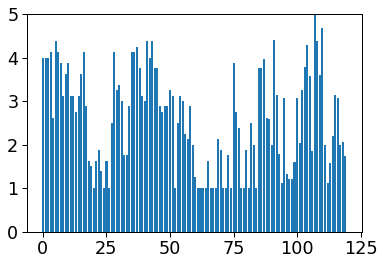

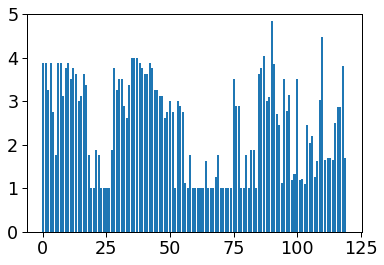

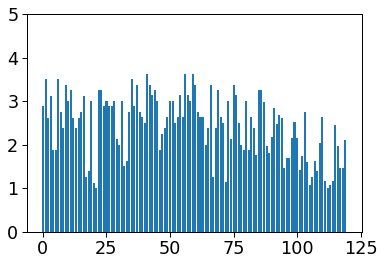

In [344]:
for i in range(3):
    plt.bar(range(df.shape[1]),df.sample(1).values[0])
    if isTasks:
        plt.ylim(0,1.1)
    else:
        plt.ylim(0,5.0)
    plt.show()

### Distribution of max values of features

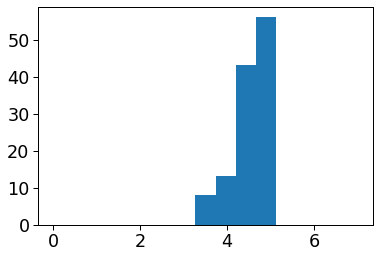

In [345]:
if isTasks:
    plt.hist(df.max(),bins = np.linspace(0,1,11))
else:
    plt.hist(df.max(),bins = np.linspace(0,7,16))

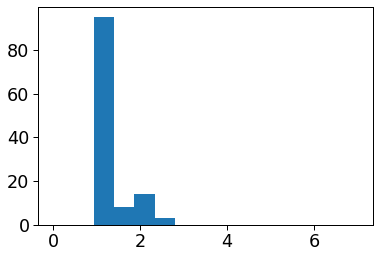

In [346]:
_ = plt.hist(df.min(),bins = np.linspace(0,7,16))

l =  10
isTasks = False


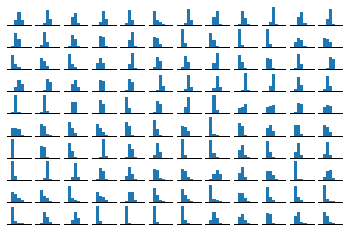

In [390]:
l = np.floor(np.sqrt(df.shape[1]))
l = int(np.ceil(l))

print('l = ',l)

#isTasks = True

if isTasks:
    print('isTasks = True')
    bins = np.linspace(0,1,11)
    yMax = 400
    nFeatures = 120
    ll = l +1
else:
    print('isTasks = False')
    bins = np.linspace(0,7,8)
    yMax = 20000
    nFeatures = 230
    ll = l + 2
    
for i in range(df.shape[1]):
    ax = plt.subplot(l, ll, i+1)
    
    plt.hist(df.iloc[:,i].values,bins = bins)
    plt.ylim(0,yMax)
    plt.xticks([],[])
    plt.yticks([],[])
    
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    #ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    
plt.savefig('features_hist_all.png',dpi = 300)

## Try some scaling

In [347]:
scaler = StandardScaler()

In [348]:
scaler.fit(df)

StandardScaler()

In [349]:
dfScaled = pd.DataFrame(data = scaler.transform(df))

l =  10
isTasks = False


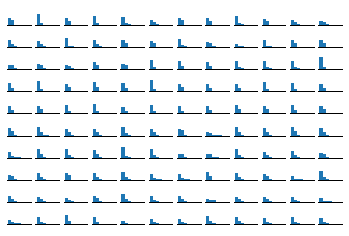

In [388]:
l = np.floor(np.sqrt(df.shape[1]))
l = int(np.ceil(l))

print('l = ',l)

#isTasks = True

if isTasks:
    print('isTasks = True')
    bins = np.linspace(0,1,11)
    yMax = 100
    nFeatures = 120
    ll = l +1
else:
    print('isTasks = False')
    bins = np.linspace(0,7,8)
    yMax = 20000
    nFeatures = 230
    ll = l + 2
    
for i in range(df.shape[1]):
    ax = plt.subplot(l, ll, i+1)
    
    plt.hist(dfScaled.iloc[:,i].values,bins = bins)
    plt.ylim(0,yMax)
    plt.xticks([],[])
    plt.yticks([],[])
    
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    #ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    
plt.savefig('features_hist_all_scaled.png',dpi = 300)

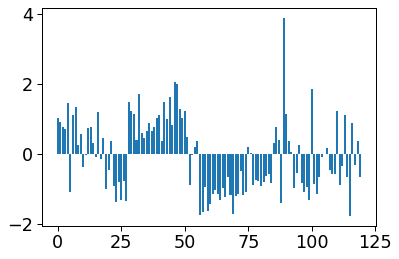

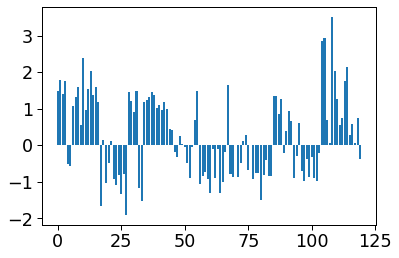

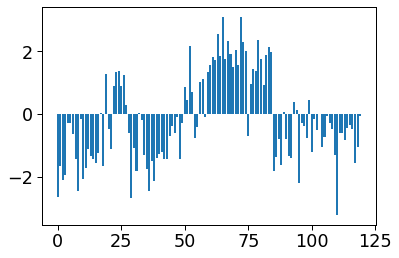

In [352]:
for i in range(3):
    plt.bar(range(df.shape[1]),dfScaled.sample(1).values[0])
    if isTasks:
        #plt.ylim(0,1.1)
        pass
    else:
        #plt.ylim(0,5.0)
        pass
    plt.show()

## Encoder

In [353]:
nFeatures = df.shape[1]

input_data = tf.keras.layers.Input(shape=(nFeatures, ))
# 230 skills/features

In [354]:
nLatent = 4

In [355]:
encoder = tf.keras.layers.Dense(nLatent)(input_data)
# Single layer for now

In [356]:
def sample_latent_features(distribution):
    
    distribution_mean, distribution_variance = distribution
    
    batch_size = tf.shape(distribution_variance)[0]
    
    random = tf.keras.backend.random_normal(shape=(batch_size, tf.shape(distribution_variance)[1]))
    
    return distribution_mean + tf.exp(0.5 * distribution_variance) * random

In [357]:
distribution_mean = tf.keras.layers.Dense(nLatent, name='mean')(encoder)
distribution_variance = tf.keras.layers.Dense(nLatent, name='log_variance')(encoder)
latent_encoding = tf.keras.layers.Lambda(sample_latent_features)([distribution_mean, distribution_variance])

In [358]:
encoder_model = tf.keras.Model(input_data, latent_encoding)
encoder_model.summary()

Model: "model_13"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_9 (InputLayer)            [(None, 120)]        0                                            
__________________________________________________________________________________________________
dense_9 (Dense)                 (None, 4)            484         input_9[0][0]                    
__________________________________________________________________________________________________
mean (Dense)                    (None, 4)            20          dense_9[0][0]                    
__________________________________________________________________________________________________
log_variance (Dense)            (None, 4)            20          dense_9[0][0]                    
___________________________________________________________________________________________

In [359]:
#out = encoder_model.call(tf.convert_to_tensor(df.iloc[:,2:].values.astype(float)))
out = encoder_model.call(tf.convert_to_tensor(dfScaled.values.astype(float)))


## Decoder

In [360]:
decoder_input = tf.keras.layers.Input(shape=(nLatent))

In [361]:
decoder_output = tf.keras.layers.Dense(nFeatures)(decoder_input)

In [362]:
decoder_model = tf.keras.Model(decoder_input, decoder_output)

In [363]:
decoder_model.summary()

Model: "model_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_10 (InputLayer)        [(None, 4)]               0         
_________________________________________________________________
dense_10 (Dense)             (None, 120)               600       
Total params: 600
Trainable params: 600
Non-trainable params: 0
_________________________________________________________________


In [364]:
encoded = encoder_model(input_data)
decoded = decoder_model(encoded)
autoencoder = tf.keras.models.Model(input_data, decoded)
autoencoder.summary()

Model: "model_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         [(None, 120)]             0         
_________________________________________________________________
model_13 (Model)             (None, 4)                 524       
_________________________________________________________________
model_14 (Model)             (None, 120)               600       
Total params: 1,124
Trainable params: 1,124
Non-trainable params: 0
_________________________________________________________________


## Make Loss Function

In [365]:
def get_loss(dist_mean,dist_var):
    def get_reconstruction_loss(y_true,y_pred):
        reconstruction_loss = tf.keras.losses.mse(y_true,y_pred)
        reconstruction_loss_batch = tf.reduce_mean(reconstruction_loss)
        return reconstruction_loss_batch*df.shape[1] # Think this refers to size of input???
    
    def get_kl_loss(dist_mean,dist_var):
        kl_loss = 1 + dist_var - tf.square(dist_mean) - tf.exp(dist_var)
        kl_loss_batch = tf.reduce_mean(kl_loss)
        return kl_loss_batch*(-0.5)
    
    def total_loss(y_true,y_pred):
        reconstruction_loss_batch = get_reconstruction_loss(y_true,y_pred)
        kl_loss_batch = get_kl_loss(dist_mean,dist_var)
        return reconstruction_loss_batch + kl_loss_batch
    return total_loss

In [366]:
autoencoder.compile(loss=get_loss(distribution_mean, distribution_variance), optimizer='adam')

In [87]:
train_data = tf.convert_to_tensor(df.iloc[0:700,2:].values.astype(float))
test_data = tf.convert_to_tensor(df.iloc[701:,2:].values.astype(float))

In [367]:
train_data = tf.convert_to_tensor(dfScaled.iloc[0:700,:].values.astype(float))
test_data = tf.convert_to_tensor(dfScaled.iloc[701:,:].values.astype(float))

In [368]:
autoencoder.fit(train_data, train_data, epochs=30, batch_size=64, validation_data=(test_data, test_data),steps_per_epoch=2000,\
                validation_steps=30)

Train on 2000 samples, validate on 23971 samples
Epoch 1/30
2000/2000 [==============================] - 5s 2ms/step - loss: 60.5768 - val_loss: 52.0607
Epoch 2/30
2000/2000 [==============================] - 3s 1ms/step - loss: 48.3895 - val_loss: 49.4835
Epoch 3/30
2000/2000 [==============================] - 3s 1ms/step - loss: 47.8745 - val_loss: 49.3536
Epoch 4/30
2000/2000 [==============================] - 3s 1ms/step - loss: 47.8221 - val_loss: 49.3293
Epoch 5/30
2000/2000 [==============================] - 3s 2ms/step - loss: 47.7855 - val_loss: 49.2787
Epoch 6/30
2000/2000 [==============================] - 3s 2ms/step - loss: 47.7480 - val_loss: 49.2351
Epoch 7/30
2000/2000 [==============================] - 4s 2ms/step - loss: 47.7250 - val_loss: 49.2171
Epoch 8/30
2000/2000 [==============================] - 3s 1ms/step - loss: 47.7186 - val_loss: 49.2100
Epoch 9/30
2000/2000 [==============================] - 3s 2ms/step - loss: 47.7173 - val_loss: 49.2162
Epoch 10/30
200

## Test

In [369]:
df = dfScaled
trial_data = df.iloc[4:6,:].values.astype(float)

In [327]:
trial_data = df.iloc[4:6,2:].values.astype(float)

In [370]:
trial_data_tf = tf.convert_to_tensor(trial_data)

In [371]:
output = autoencoder.predict(trial_data_tf,steps=10)

Text(0.5, 1.0, 'Encoded & Decoded Original')

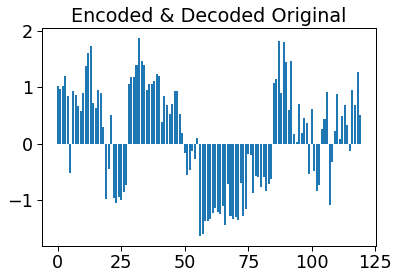

In [372]:
plt.bar(range(len(output[0])),output[0])
plt.title('Encoded & Decoded Original')

Text(0.5, 1.0, 'Original')

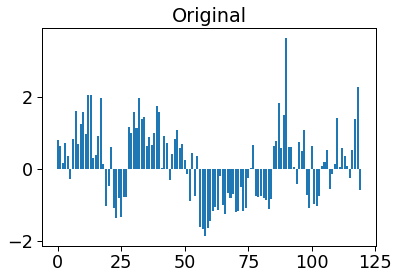

In [373]:
plt.bar(range(len(output[0])),trial_data[0,:])
plt.title('Original')

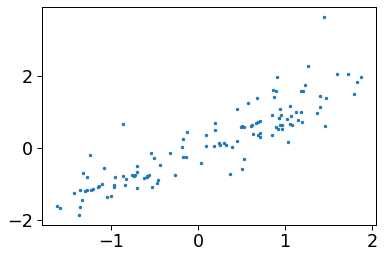

In [374]:
plt.plot(output[0],trial_data[0,:],'.')

## Transform it back

(0.0, 5.0)

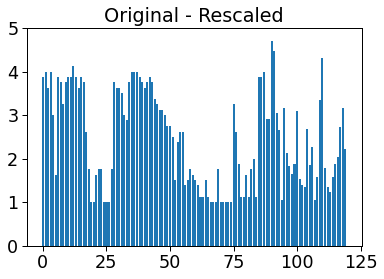

In [385]:
plt.bar(range(len(output[0])),scaler.inverse_transform([trial_data[1,:]])[0])
plt.title('Original - Rescaled')
plt.ylim(0,5)

(0.0, 5.0)

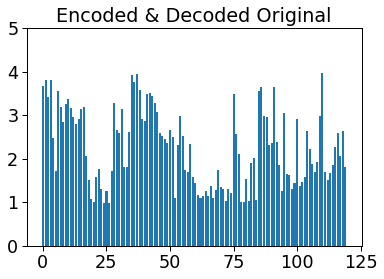

In [386]:
plt.bar(range(len(output[0])),scaler.inverse_transform([output[1]])[0])
plt.title('Encoded & Decoded Original')
plt.ylim(0,5)

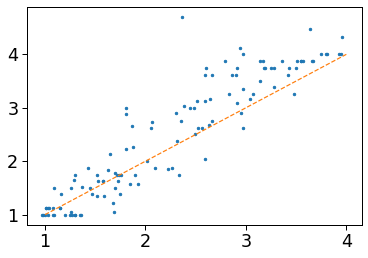

In [395]:
plt.plot(scaler.inverse_transform([output[1]])[0],scaler.inverse_transform([trial_data[1,:]])[0],'.')
plt.plot([1,4],[1,4],'--')

## Sample Latent Features

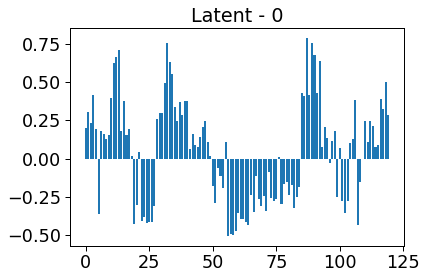

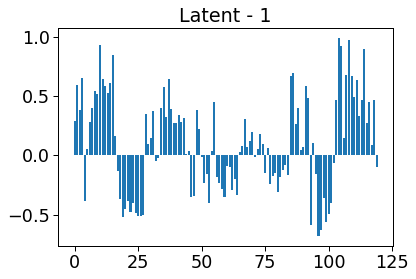

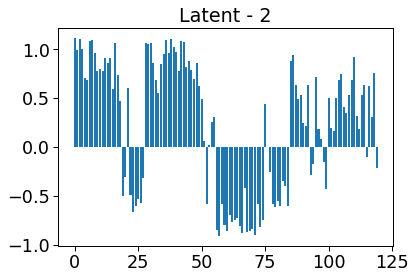

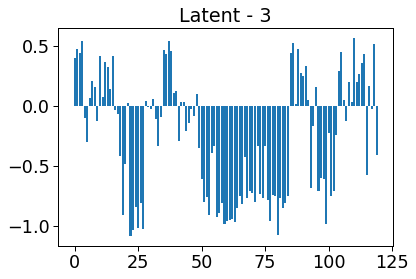

In [375]:
for n in range(nLatent):
    inZeros = np.array([[0]*nLatent])
    inZeros[0,n] = 1.
    sample_data = tf.convert_to_tensor(inZeros)
    
    output = decoder_model.predict(sample_data,steps=10)
    
    plt.bar(range(len(output[0])),output[0])
    plt.title('Latent - '+str(n))
    #plt.ylim(-0.05,0.8)
    plt.show()

## Check out a few random jobs

In [96]:
trial_data = df.iloc[4:6,2:].values.astype(float)

In [110]:
df.sample(1).iloc[:,2:].values.shape

(1, 230)

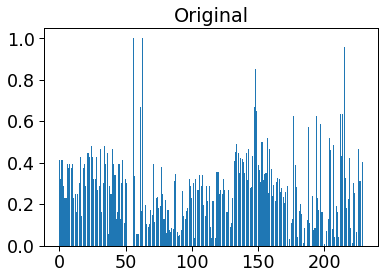

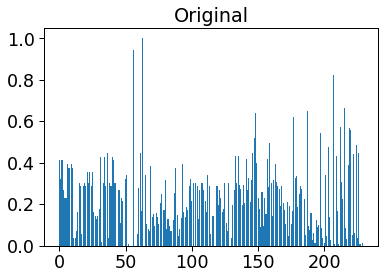

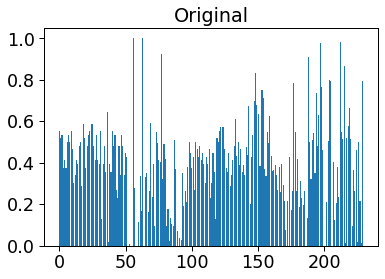

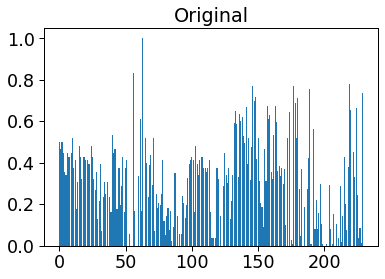

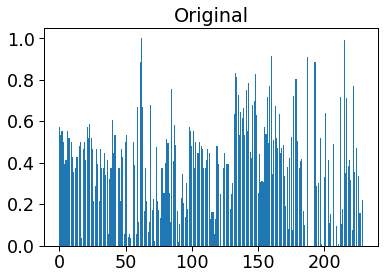

In [113]:
for i in range(5):
    plt.bar(range(230),df.sample(1).iloc[0,2:].values)
    plt.title('Original')
    plt.show()

## Compare Distances

In [396]:
trial_data = df.values.astype(float)
trial_data_tf = tf.convert_to_tensor(trial_data)
output = autoencoder.predict(trial_data_tf,steps=10)

In [397]:
predictionDistances = []

for nn in range(trial_data.shape[0]):
    predictionDistances.append(distance.cosine(output[nn],trial_data[nn,:]))

In [399]:
%%time

pairwiseDistances = []
minDistances = []

nn = trial_data.shape[0]
nn = 400

for i in range(trial_data.shape[0])[0:nn]:
    tempDistances = np.ones(nn)
    
    for j in range(trial_data.shape[0])[0:nn]:
        tempDistance = distance.cosine(trial_data[i,:],trial_data[j,:])
        pairwiseDistances.append(tempDistance)
        
        if not i == j:
            tempDistances[j] = tempDistance
        
    minDistances.append(np.min(tempDistances))

CPU times: user 5.71 s, sys: 33.2 ms, total: 5.74 s
Wall time: 5.74 s


In [ ]:
%%time

sampleDistances = []

for n in range(100):
    latentActivations = np.random.random(size=(1,nLatent))
    sample_data = tf.convert_to_tensor(latentActivations)

    output = decoder_model.predict(sample_data,steps=10)
    
    distances = np.zeros(trial_data.shape[0])
    
    for i in range(trial_data.shape[0]):
        distances[i] = distance.cosine(trial_data[i,:],output[0])
    
    sampleDistances.append(np.min(distances))

(0.0, 0.2)

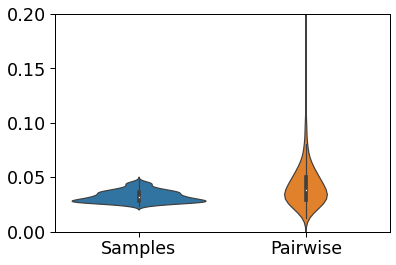

In [68]:
sns.violinplot(data=[sampleDistances,minDistances])
plt.xticks([0,1],['Samples','Pairwise'])
plt.ylim(0,0.2)

In [71]:
print('Sample Mean = {:.3f}'.format(np.mean(sampleDistances)))
print('Pairwise Mean = {:.3f}'.format(np.mean(minDistances)))

Sample Mean = 0.033
Pairwise Mean = 0.042


([<matplotlib.axis.XTick at 0x7fee6d88e590>,
 [Text(0, 0, 'Predictions'), Text(1, 0, 'Pairwise')])

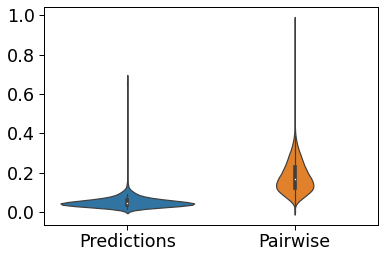

In [72]:
sns.violinplot(data=[predictionDistances,pairwiseDistances])
plt.xticks([0,1],['Predictions','Pairwise'])

In [73]:
print('Predictions Mean = {:.3f}'.format(np.mean(predictionDistances)))
print('Pairwise Mean = {:.3f}'.format(np.mean(minDistances)))

Predictions Mean = 0.052
Pairwise Mean = 0.042
